In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd


print(os.path.abspath(os.curdir))



C:\Users\arez_\PycharmProjects\AMLS_19-20_Muhammad_Juzaimi_SN16072927\AMLS_19-20_SN16072927


In [11]:
# os.chdir('./AMLS_19-20_SN16072927')
os.chdir('./A1')
print(os.path.abspath(os.curdir))

C:\Users\arez_\PycharmProjects\AMLS_19-20_Muhammad_Juzaimi_SN16072927\AMLS_19-20_SN16072927\A1


In [12]:
#import data

import A1_landmarks as l1
import numpy as np 

def get_data():

    X, y = l1.extract_features_labels()
    Y = np.array([y, -(y - 1)]).T
    tr_X, te_X, tr_Y, te_Y = train_test_split(X, Y, test_size=0.3)

    return tr_X, tr_Y, te_X, te_Y


In [7]:
tr_X, tr_Y, te_X, te_Y = get_data()

In [4]:
os.chdir('..')
print(os.path.abspath(os.curdir))

C:\Users\arez_\PycharmProjects\AMLS_19-20_Muhammad_Juzaimi_SN16072927\AMLS_19-20_SN16072927


In [3]:
import pickle

# with open('trX_saved.dat', 'wb') as f:
#     pickle.dump(tr_X, f) 
    
with open('trX_saved.dat', 'rb') as f:
    tr_X = pickle.load(f)

In [4]:
# with open('trY_saved.dat', 'wb') as f:
#     pickle.dump(tr_Y, f)
    
with open('trY_saved.dat', 'rb') as f:
    tr_Y = pickle.load(f)

In [6]:
# with open('teX_saved.dat', 'wb') as f:
#     pickle.dump(te_X, f)
    
with open('teX_saved.dat', 'rb') as f:
    te_X = pickle.load(f)

In [7]:
# with open('teY_saved.dat', 'wb') as f:
#     pickle.dump(te_Y, f)

with open('teY_saved.dat', 'rb') as f:
    te_Y = pickle.load(f)
    
# print(load_data)

In [9]:
from sklearn.preprocessing import StandardScaler

temp = tr_X.reshape(len(tr_X), 68*2)
temp2 = te_X.reshape(len(te_X), 68*2)

scaler = StandardScaler()
temp_train = scaler.fit_transform(temp)
temp_test = scaler.transform(temp2)

In [18]:
from sklearn.model_selection import GridSearchCV

def img_SVM(training_images, training_labels, test_images, test_labels):
    
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100]}, 
                        {'kernel': ['poly'], 'degree': [2, 3], 'C': [1, 10, 100]},
                        {'kernel': ['linear'], 'C': [1, 10, 100]}
                        ]
    
    classifier = GridSearchCV(svm.SVC(), tuned_parameters, n_jobs=-1)       #gridsearchCV use 3 k-fold by default
    classifier.fit(training_images, training_labels)

# default score of SVM is accuracy
    print("Best score for tr:", classifier.best_score_)
    print(classifier.best_params_)
    print(classifier.best_estimator_)
#     print("Best C:", classifier.best_estimator_.C)
#     print("Best Kernel:", classifier.best_estimator_.kernel)
#     print("Best Gamma:", classifier.best_estimator_.gamma)
#     print("Best Degree:", classifier.best_estimator_.degree)    
#     print(classifier.cv_results_)
    

# make prediction using the best classifier
    pred = classifier.best_estimator_.predict(test_images)
    return pred
    print("Accuracy:", accuracy_score(test_labels, pred))

pred=img_SVM(temp_train, list(zip(*tr_Y))[0], temp_test, list(zip(*te_Y))[0])

Best score for tr: 0.9176130333262578
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [11]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects
    """
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

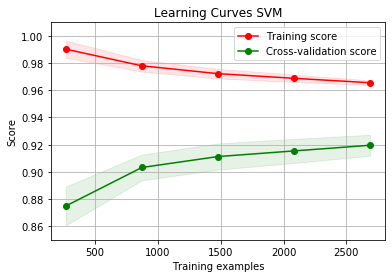

In [14]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves SVM"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = svm.SVC(kernel='rbf', gamma=1e-3, C=100)
X, y = temp_train, list(zip(*tr_Y))[0]
plot_learning_curve(estimator, title, X, y, (0.85, 1.01), cv=cv, n_jobs=-1)

plt.show()

# default test score for SVM is accuracy

[[674  47]
 [ 64 656]]


<function matplotlib.pyplot.show(*args, **kw)>

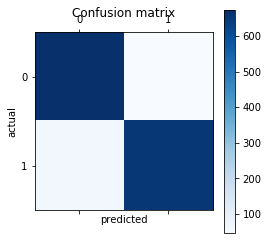

In [19]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

test_label = list(zip(*te_Y))[0]
cf = confusion_matrix(test_label, pred)
print(cf)

cmap = plt.cm.Blues

plt.matshow(cf, cmap = cmap)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show

In [33]:
# os.chdir('..')
# os.chdir('./AMLS_19-20_SN16072927')
print(os.path.abspath(os.curdir))

C:\Users\arez_\PycharmProjects\AMLS_19-20_Muhammad_Juzaimi_SN16072927\AMLS_19-20_SN16072927
